# **Pembelajaran Mesin - Tugas Besar 1 - Clustering**

### I Wayan Adi Wahyudi
### 1301194084
### IF-43-08

## **Formulasi Masalah**


#### Diberikan dataset berupa kendaraan yang dimana kita diwajibkan untuk merancang atau membuat model yang dapat mengklusterisasi dataset yang disediakan. Yang berguna untuk mengelompokkan pelanggan berdasarkan dataset yang diberikan Dan dataset tersebut merupakan data latih yang dimana akan dilakukan pemodelan, evaluasi, dan eksperimen untuk nantinya.


## **Import Library dan Membaca Dataset**

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv("Datasets/kendaraan_train.csv")
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


## **Eksplorasi dan Persiapan Data**

In [106]:
print("Column : ",df.shape[0])
print("Rows : ",df.shape[1])

Column :  285831
Rows :  12


In [107]:
df.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [108]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,285831.0,142916.000000,82512.446734,1.0,71458.5,142916.0,214373.50,285831.0
Umur,271617.0,38.844336,15.522487,20.0,25.0,36.0,49.00,85.0
SIM,271427.0,0.997848,0.046335,0.0,1.0,1.0,1.00,1.0
Kode_Daerah,271525.0,26.405410,13.252714,0.0,15.0,28.0,35.00,52.0
Sudah_Asuransi,271602.0,0.458778,0.498299,0.0,0.0,0.0,1.00,1.0
Premi,271262.0,30536.683472,17155.000770,2630.0,24398.0,31646.0,39377.75,540165.0
Kanal_Penjualan,271532.0,112.021567,54.202457,1.0,29.0,132.0,152.00,163.0
Lama_Berlangganan,271839.0,154.286302,83.694910,10.0,82.0,154.0,227.00,299.0
Tertarik,285831.0,0.122471,0.327830,0.0,0.0,0.0,0.00,1.0


In [109]:
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


### **Outlier**

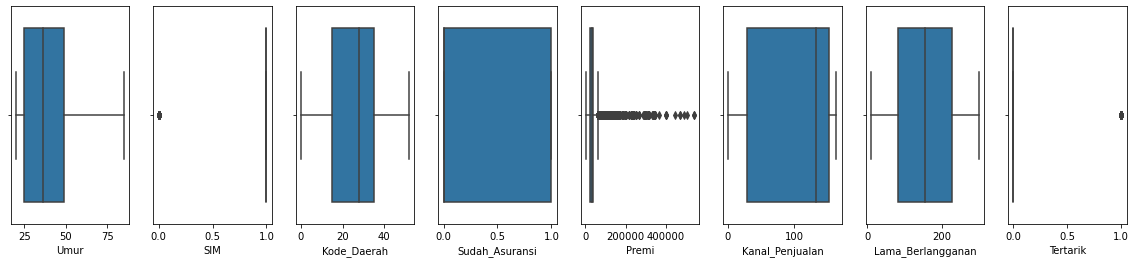

In [110]:
# Check outlier
fig, ax = plt.subplots(ncols=8, figsize=(20,4))
i=0
for column in df:
    if column != 'id' and df[column].dtypes != 'object':
        sns.boxplot(x=column, data=df, ax=ax[i])
        i = i + 1


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Boxplot Baru Column "Premi"')]

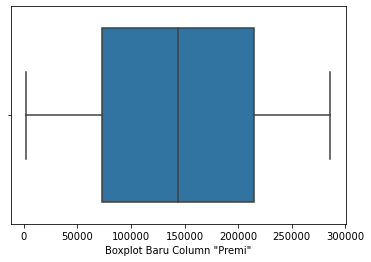

In [111]:
# Column premi
# IQR
Q1 = df['Premi'].quantile(0.25)
 
Q3 = df['Premi'].quantile(0.75)

IQR = Q3 - Q1   
 
# Upper bound
df['Premi'] = df[df['Premi'] <= (Q3+1.5*IQR)]
# Lower bound
df['Premi'] = df[df['Premi'] >= (Q1-1.5*IQR)]

sns.boxplot(df['Premi']).set(xlabel='Boxplot Baru Column "Premi"')
 

### **Missing Value, Labelling and Normalize** 

In [112]:
df.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                23692
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [113]:
# Fill Missing Value 

# Numerical replace with mean
numerical =  ["Umur", "Premi", "Lama_Berlangganan"]

for column in numerical:
    df[column] = df[column].replace(np.NaN,df[column].mean())

# Categorical replace with mode 
for column in df:
    if column != numerical:
        df[column] = df[column].replace(np.NaN, df[column].mode()[0])

In [114]:
df.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [115]:
# Replace Categorical with Numeric
# Jenis Kelamin, Umur Kendaran dan Kendaraan Rusak
df = df.replace({
    'Wanita':0,
    'Pria':1,
    '< 1 Tahun':0,
    '1-2 Tahun':1,
    '> 2 Tahun':2,
    'Tidak':0,
    'Pernah':1
})

In [116]:
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30.0,1.0,33.0,1.0,0,0,143780.436963,152.0,97.0,0
1,2,1,48.0,1.0,39.0,0.0,2,1,143780.436963,29.0,158.0,0
2,3,1,21.0,1.0,46.0,1.0,0,0,143780.436963,160.0,119.0,0
3,4,0,58.0,1.0,48.0,0.0,1,0,143780.436963,124.0,63.0,0
4,5,1,50.0,1.0,35.0,0.0,2,1,143780.436963,88.0,194.0,0


In [117]:
# Normalize

df = (df-df.mean()) /df.std()
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,-1.732042,-1.136620,-0.584494,0.045248,0.504182,1.137494,-1.124496,-1.060574,4.597326e-14,0.709303,-0.701860,-0.373581
1,-1.732030,0.879798,0.605069,0.045248,0.968525,-0.879123,2.449372,0.942882,4.597326e-14,-1.587901,0.045499,-0.373581
2,-1.732017,0.879798,-1.179276,0.045248,1.510259,1.137494,-1.124496,-1.060574,4.597326e-14,0.858715,-0.432321,-0.373581
3,-1.732005,-1.136620,1.265937,0.045248,1.665040,-0.879123,0.662438,-1.060574,4.597326e-14,0.186362,-1.118421,-0.373581
4,-1.731993,0.879798,0.737242,0.045248,0.658963,-0.879123,2.449372,0.942882,4.597326e-14,-0.485990,0.486564,-0.373581


### **Correlation**

In [118]:
# Drop column id

df = df.drop(columns="id")

In [119]:
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,-1.136620,-0.584494,0.045248,0.504182,1.137494,-1.124496,-1.060574,4.597326e-14,0.709303,-0.701860,-0.373581
1,0.879798,0.605069,0.045248,0.968525,-0.879123,2.449372,0.942882,4.597326e-14,-1.587901,0.045499,-0.373581
2,0.879798,-1.179276,0.045248,1.510259,1.137494,-1.124496,-1.060574,4.597326e-14,0.858715,-0.432321,-0.373581
3,-1.136620,1.265937,0.045248,1.665040,-0.879123,0.662438,-1.060574,4.597326e-14,0.186362,-1.118421,-0.373581
4,0.879798,0.737242,0.045248,0.658963,-0.879123,2.449372,0.942882,4.597326e-14,-0.485990,0.486564,-0.373581


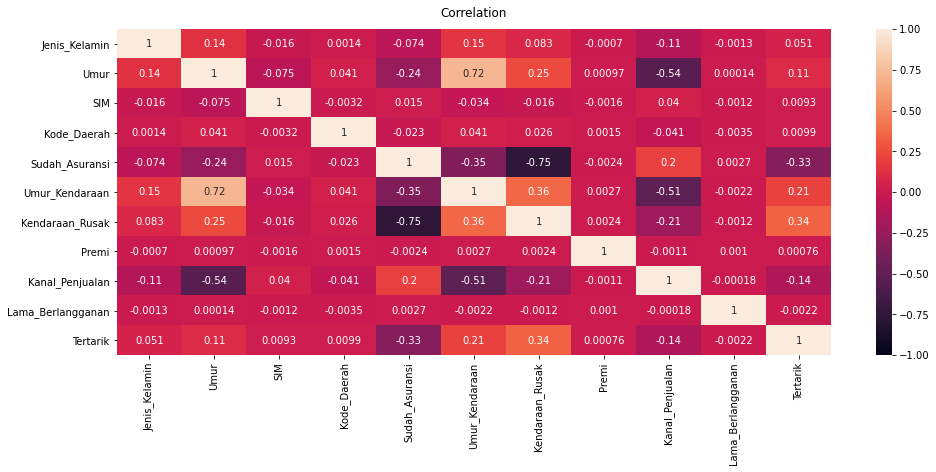

In [120]:
# Heatmap

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation', fontdict={'fontsize':12}, pad=12);

In [121]:
df.corr()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Jenis_Kelamin,1.000000,0.135939,-0.015906,0.001435,-0.074485,0.149022,0.082619,-0.000696,-0.105351,-0.001275,0.051317
Umur,0.135939,1.000000,-0.075196,0.041450,-0.237193,0.719478,0.249291,0.000969,-0.541391,0.000140,0.107147
SIM,-0.015906,-0.075196,1.000000,-0.003182,0.015248,-0.034404,-0.016430,-0.001639,0.040482,-0.001200,0.009341
Kode_Daerah,0.001435,0.041450,-0.003182,1.000000,-0.022552,0.040864,0.026271,0.001530,-0.040780,-0.003543,0.009897
Sudah_Asuransi,-0.074485,-0.237193,0.015248,-0.022552,1.000000,-0.349443,-0.749782,-0.002434,0.203413,0.002668,-0.326014
Umur_Kendaraan,0.149022,0.719478,-0.034404,0.040864,-0.349443,1.000000,0.364302,0.002716,-0.509340,-0.002208,0.213454
Kendaraan_Rusak,0.082619,0.249291,-0.016430,0.026271,-0.749782,0.364302,1.000000,0.002378,-0.207298,-0.001250,0.337919
Premi,-0.000696,0.000969,-0.001639,0.001530,-0.002434,0.002716,0.002378,1.000000,-0.001067,0.001028,0.000761
Kanal_Penjualan,-0.105351,-0.541391,0.040482,-0.040780,0.203413,-0.509340,-0.207298,-0.001067,1.000000,-0.000181,-0.135812
Lama_Berlangganan,-0.001275,0.000140,-0.001200,-0.003543,0.002668,-0.002208,-0.001250,0.001028,-0.000181,1.000000,-0.002168


## **Pemodelan (K-Means)**

In [122]:
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,-1.136620,-0.584494,0.045248,0.504182,1.137494,-1.124496,-1.060574,4.597326e-14,0.709303,-0.701860,-0.373581
1,0.879798,0.605069,0.045248,0.968525,-0.879123,2.449372,0.942882,4.597326e-14,-1.587901,0.045499,-0.373581
2,0.879798,-1.179276,0.045248,1.510259,1.137494,-1.124496,-1.060574,4.597326e-14,0.858715,-0.432321,-0.373581
3,-1.136620,1.265937,0.045248,1.665040,-0.879123,0.662438,-1.060574,4.597326e-14,0.186362,-1.118421,-0.373581
4,0.879798,0.737242,0.045248,0.658963,-0.879123,2.449372,0.942882,4.597326e-14,-0.485990,0.486564,-0.373581


In [123]:
# Selected column or feature

selected = ['Umur','Kanal_Penjualan']
df_selected = df[selected]
df_selected.head()

,Umur,Kanal_Penjualan
0,-0.584494,0.709303
1,0.605069,-1.587901
2,-1.179276,0.858715
3,1.265937,0.186362
4,0.737242,-0.485990


In [124]:
# Perhitungan Jarak menggunakan Euclidean Distance
def euclidean_distance(a,b):
    return np.sqrt(np.sum((a - b) ** 2))

In [125]:
def kmeans(dataframe, k, limit):

  df = dataframe.to_numpy()

  # Init centroid
  old_centroid  =  {i : [np.random.choice(df[:,k]) for k in range(len(df[0]))] for i in range(k)}

  # Centroid baru
  centroids = old_centroid.copy()

  i = 0
  # Pengecekan Centeroid 
  condition = False
  while i <= limit and condition == False:

    print(f'i = {i}')
    for cent in centroids:
      print(f'Centroid {cent} : \n{centroids[cent]}')

    # Cluster dan Labeling
    clusters = {i: [] for i in range(k)}
    Label = []
    
    # Jarak Centeroid
    for titik in df:
      dist = [euclidean_distance(titik, centroids[cent]) for cent in centroids]
      clusters[dist.index(min(dist))].append(titik)

    old_centroid = centroids.copy()
    for cl in clusters:
      centroids[cl] = np.mean(clusters[cl], axis=0)

    
    # Stopping codition
    for cent in old_centroid.keys():
      if list(centroids.get(cent)) == list(old_centroid.get(cent)):
        condition = True

    i = i + 1

  return centroids, clusters

In [126]:
centroids, clusters = kmeans(dataframe=df_selected, k=3, limit=100)

i = 0
Centroid 0 : 
[-0.9810151077956677, 0.7093032719754284]
Centroid 1 : 
[-0.6505809575083291, -1.6626068135785863]
Centroid 2 : 
[2.1911527349627833, -1.6439303562120193]
i = 1
Centroid 0 : 
[-0.46098607  0.5986168 ]
Centroid 1 : 
[ 0.14846893 -1.64658383]
Centroid 2 : 
[ 1.61965206 -0.96823372]
i = 2
Centroid 0 : 
[-0.51137624  0.60751754]
Centroid 1 : 
[ 0.27424744 -1.6551734 ]
Centroid 2 : 
[ 1.6638299  -0.69213328]
i = 3
Centroid 0 : 
[-0.54612276  0.61353445]
Centroid 1 : 
[ 0.3746619  -1.65693421]
Centroid 2 : 
[ 1.65238157 -0.47127586]
i = 4
Centroid 0 : 
[-0.57236253  0.6168946 ]
Centroid 1 : 
[ 0.46603163 -1.65805854]
Centroid 2 : 
[ 1.61088581 -0.27366472]
i = 5
Centroid 0 : 
[-0.60398016  0.62496798]
Centroid 1 : 
[ 0.55484421 -1.65932003]
Centroid 2 : 
[ 1.50243164 -0.08235367]
i = 6
Centroid 0 : 
[-0.63133022  0.62938126]
Centroid 1 : 
[ 0.68190447 -1.66008464]
Centroid 2 : 
[1.34561025 0.16693216]
i = 7
Centroid 0 : 
[-0.67375939  0.64076671]
Centroid 1 : 
[ 0.7650375

In [127]:
# Mengembalikan ke dataframe

def clustering(clusters):
  colors = ['red', 'green', 'blue', 'yellow', 'silver', 'brown']
  df_cluster = []
  for key in clusters.keys():
    for cl in clusters.get(key):
      df_cluster.append((cl[0], cl[1], key, colors[key]))
  df_cluster = pd.DataFrame(df_cluster)
  df_cluster.columns = ['Umur', 'Kanal_Penjualan', 'Cluster', 'Warna']
  return df_cluster

df_cluster = clustering(clusters)

In [128]:
df_cluster.tail()

,Umur,Kanal_Penjualan,Cluster,Warna
285826,0.737242,0.186362,2,blue
285827,0.472895,0.709303,2,blue
285828,1.464198,0.186362,2,blue
285829,0.208548,0.186362,2,blue
285830,1.926805,0.186362,2,blue


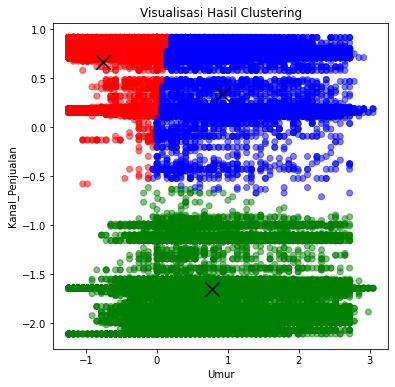

In [129]:
def plot_cluster(data):
  plt.figure(figsize=(6,6))
  plt.title('Visualisasi Hasil Clustering')
  plt.scatter(data['Umur'], data['Kanal_Penjualan'], color=data['Warna'], alpha=0.5)
  
  for i in centroids:
    plt.scatter(centroids[i][0], centroids[i][1], color='k', marker='x',s=200)

  plt.xlabel("Umur")
  plt.ylabel("Kanal_Penjualan")
  plt.show()

plot_cluster(df_cluster)

## **Evaluasi**

In [130]:
from sklearn.cluster import KMeans

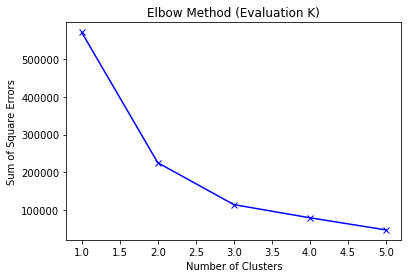

In [131]:
SSE = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k).fit(df_selected)
    SSE.append(km.inertia_)

plt.plot(K, SSE, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square Errors')
plt.title('Elbow Method (Evaluation K)')
plt.show()

## **Experiment**

i = 0
Centroid 0 : 
[2.058979074847848, -1.6439303562120193]
Centroid 1 : 
[1.1337634540432997, -1.6439303562120193]
Centroid 2 : 
[2.1250659049053153, 0.1863624657115511]
Centroid 3 : 
[0.2746346632962191, -1.6439303562120193]
i = 1
Centroid 0 : 
[ 2.10286376 -1.661596  ]
Centroid 1 : 
[ 1.10824536 -1.64972298]
Centroid 2 : 
[0.81528819 0.45333456]
Centroid 3 : 
[-0.58581473  0.15356433]
i = 2
Centroid 0 : 
[ 2.10813003 -1.64405022]
Centroid 1 : 
[ 0.56400563 -1.65545913]
Centroid 2 : 
[0.91488101 0.36496975]
Centroid 3 : 
[-0.76069138  0.60707888]
i = 3
Centroid 0 : 
[ 1.94023549 -1.65495486]
Centroid 1 : 
[ 0.39378608 -1.65201625]
Centroid 2 : 
[0.91366528 0.33991603]
Centroid 3 : 
[-0.76003317  0.66669215]
i = 4
Centroid 0 : 
[ 1.81345223 -1.65784459]
Centroid 1 : 
[ 0.32377    -1.65120282]
Centroid 2 : 
[0.91195687 0.33833175]
Centroid 3 : 
[-0.76076837  0.66769049]
i = 5
Centroid 0 : 
[ 1.76535123 -1.65858957]
Centroid 1 : 
[ 0.29666447 -1.6507148 ]
Centroid 2 : 
[0.91162291 0.33

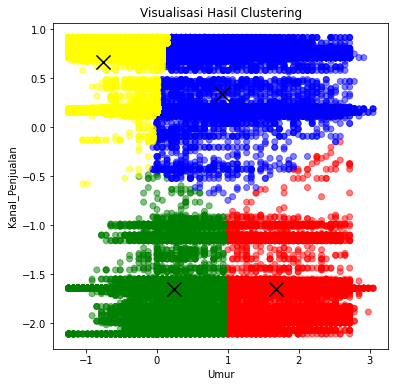

In [132]:
# Dengan K = 4
centroids, clusters = kmeans(dataframe=df_selected, k=4, limit=100)
df_k_4 = clustering(clusters=clusters)
plot_cluster(df_k_4)

i = 0
Centroid 0 : 
[-0.9810151077956677, -1.6439303562120193]
Centroid 1 : 
[-0.38623363727845816, -1.6439303562120193]
Centroid 2 : 
[1.1337634540432997, 0.7093032719754284]
Centroid 3 : 
[-1.1131887679106032, 0.7093032719754284]
Centroid 4 : 
[-2.7704935045780103e-14, 0.7093032719754284]
i = 1
Centroid 0 : 
[-0.96859917 -1.66217848]
Centroid 1 : 
[ 0.74383595 -1.66067562]
Centroid 2 : 
[1.4409845  0.13895758]
Centroid 3 : 
[-0.96196796  0.71335155]
Centroid 4 : 
[0.01260023 0.45145036]
i = 2
Centroid 0 : 
[-0.56908317 -1.66599044]
Centroid 1 : 
[ 0.93584691 -1.65597359]
Centroid 2 : 
[1.46982622 0.3134055 ]
Centroid 3 : 
[-0.94107134  0.71478342]
Centroid 4 : 
[0.11510427 0.4266468 ]
i = 3
Centroid 0 : 
[-0.23907615 -1.65787205]
Centroid 1 : 
[ 1.10578401 -1.65330541]
Centroid 2 : 
[1.50147603 0.33703712]
Centroid 3 : 
[-0.92907971  0.71199726]
Centroid 4 : 
[0.15370578 0.41297978]
i = 4
Centroid 0 : 
[-0.04581246 -1.6542299 ]
Centroid 1 : 
[ 1.27894674 -1.65421735]
Centroid 2 : 
[1

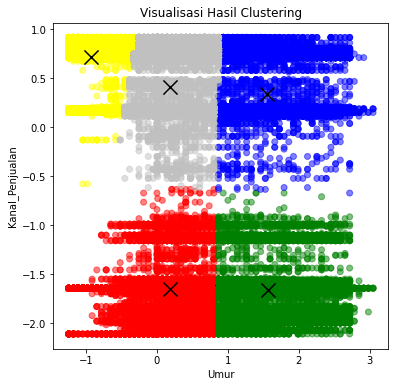

In [133]:
# Dengan K = 5
centroids, clusters = kmeans(dataframe=df_selected, k=5, limit=100)
df_k_5 = clustering(clusters=clusters)
plot_cluster(df_k_5)

## **Kesimpulan**

#### Setelah melakukan Eksplorasi data, Persiapan data, Pemodelan dan Evaluasi bisa saya simpulkan bahwa.Algoritma Clustering K-Means sendiri melakukan pengelompokkan dengan cara membagi data sejumlah n K yang sudah ditentukan. Setelah itu menggunakan perhitungan jarak salah satunya dengan Euclidean Distance untuk mengukur kemiripannya antar datanya .Dengan meningkatnya nilai kluster yang kita sudah inisialisasi maka semakin baik juga hasilnya. Dan salah satu hal yang saya notice juga, waktu yang digunakan untuk menjalankan program ini, dimana waktu tersebut bisa dibilang memakan waktu. Mungkin karena iterasi yang dilakukan cukup banyak
